In [62]:
from scipy.sparse import coo_matrix
import bioframe as bf
import bioframe.vis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
%matplotlib inline

from collections import Counter
import itertools
import sys
from collections import OrderedDict
import random
import seaborn as sns
import scipy
import pickle


# call MACS3 peaks

In [63]:
#callpeak (narrow) shift and extend

# bed='/Mp.reducedchroms.sorted.p4m5.sorted.bed'
# outdir='/macs3peaks'
# !bsub -q short -W 08:00 -n 4 -R "span[hosts=1]" -R "rusage[mem=8000]" \
#         "macs3 callpeak -t $bed -g hs -f BED --nomodel --shift -75 --extsize 150 --name allM --outdir $outdir"



# coverage at peaks: peakscov.py


In [64]:
#peakscov.py

# import bioframe
# import pandas as pd
# import numpy as np
# import scipy
# import sys
# import os

# arguments=sys.argv

# directory=arguments[1]
# cov=arguments[2]
# peaks=arguments[3]
# outdir=arguments[4]
# logdir=arguments[5]

# f = open(f'{logdir}/{cov}.log','w')
# f.close()
# f=open(f'{logdir}/{cov}.log','a')
# f.write("go\n")
# f.flush()

# ##first cov
# #files
# cov_df=pd.read_csv(f'{directory}/{cov}/{cov}.genomcov.raw.bed',sep='\t',names=['chrom','start','end','cov'])
# peaks_df=pd.read_csv(f'{peaks}',sep='\t',names=['chrom','start','end','Mscore','mGscore','pGscore'])
# f.write("files in\n")
# f.flush()

# #overlap peaks with cov
# peaks_cov=bioframe.overlap(peaks_df,cov_df,how='left',suffixes=('','_cov'))
# f.write("overlap\n")
# f.flush()

# #calculate cov at peaks
# cov_mat = peaks_cov.groupby(['chrom','start','end'])['cov_cov'].sum()

# f.write("counts\n")
# f.flush()

# #save
# cov_mat_df = cov_mat.reset_index()
# cov_mat_df.to_csv(f'{outdir}/{cov}.out', sep='\t', index=False)

# f.write("fini\n")
# f.close()




In [65]:
#import os

# #1
# directory='/coverage/files'
# #3
# peaks='/union_R1R3_narrowPeaks_bothfirst_pmit.sorted.bed'
# #4
# outdir='/coverage/cov_allpeaks'
# #5
# logdir='/coverage/log'

# for cov in os.listdir(directory):
#     if os.path.isdir(os.path.join(directory,cov)):
#         !bsub -q short -W 04:00 -n 4 -R "span[hosts=1]" -R rusage[mem=24000] \
#             "source activate open2c2v2; python /coverage/peakscov.py {directory} {cov} {peaks} {outdir} {logdir}"


# Pooled peakset, keep ind replicate scores and overlap


In [66]:
mMR1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/mM_R1_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
mMR3=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/mM_R2_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)

pMR1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pM_R1_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
pMR3=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pM_R2_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)

pMR1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pM_R1_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
pMR3=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pM_R2_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)

mGR1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/mG_R1_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
mGR3=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/mG_R2_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)

pGR1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pG_R1_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
pGR3=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/pG_R2_peaks.narrowPeak', sep='\t', names=['chrom','start','end','name','score','x','fc','-log10p','-log10q','s-s'], index_col=None)
pGR3


,chrom,start,end,name,score,x,fc,-log10p,-log10q,s-s
0,chr1,820000,820432,pG_R2_peak_1,45,.,2.85412,6.51850,4.52402,106
1,chr1,820495,821412,pG_R2_peak_2,60,.,3.10466,8.11686,6.05475,670
2,chr1,821465,821724,pG_R2_peak_3,31,.,2.48880,5.02713,3.12693,156
3,chr1,822063,822247,pG_R2_peak_4,40,.,2.53061,6.03055,4.06223,79
4,chr1,826647,827978,pG_R2_peak_5,719,.,9.22495,75.61400,71.94060,853
...,...,...,...,...,...,...,...,...,...,...
141293,chrY,22308249,22308493,pG_R2_peak_141294,27,.,2.70908,4.57909,2.70553,229
141294,chrY,22370744,22371026,pG_R2_peak_141295,170,.,5.86968,19.38230,17.01960,139
141295,chrY,26403181,26403331,pG_R2_peak_141296,42,.,3.16060,6.24916,4.26521,58
141296,chrY,26409089,26409292,pG_R2_peak_141297,54,.,3.46161,7.46185,5.42428,140


In [67]:
allmerged=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/allpeaks_R1R3_merged_pooledM',
                      sep='\t',names=['chrom','start','end'])
allmerged


,chrom,start,end
0,chr1,826630,828066
1,chr1,858687,859056
2,chr1,866171,866515
3,chr1,869443,870290
4,chr1,875202,875737
...,...,...,...
159067,chrY,21845260,21846134
159068,chrY,22263963,22264219
159069,chrY,22265642,22266678
159070,chrY,22370661,22371030


In [68]:
#add peak scores for pooled and keep highest only
mM1=bf.overlap(allmerged,mMR1,suffixes=('','_mM1'))
mM1f=mM1.fillna(0).sort_values('score_mM1').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

mM3=bf.overlap(allmerged,mMR3,suffixes=('','_mM3'))
mM3f=mM3.fillna(0).sort_values('score_mM3').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

pM1=bf.overlap(allmerged,pMR1,suffixes=('','_pM1'))
pM1f=pM1.fillna(0).sort_values('score_pM1').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

pM3=bf.overlap(allmerged,pMR3,suffixes=('','_pM3'))
pM3f=pM3.fillna(0).sort_values('score_pM3').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

mG1=bf.overlap(allmerged,mGR1,suffixes=('','_mG1'))
mG1f=mG1.fillna(0).sort_values('score_mG1').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

mG3=bf.overlap(allmerged,mGR3,suffixes=('','_mG3'))
mG3f=mG3.fillna(0).sort_values('score_mG3').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

pG1=bf.overlap(allmerged,pGR1,suffixes=('','_pG1'))
pG1f=pG1.fillna(0).sort_values('score_pG1').drop_duplicates(subset=['chrom', 'start','end'], keep='last')

pG3=bf.overlap(allmerged,pGR3,suffixes=('','_pG3'))
pG3f=pG3.fillna(0).sort_values('score_pG3').drop_duplicates(subset=['chrom', 'start','end'], keep='last')


print(len(mM1f),len(mG3f),len(pG3f))
pG1f


159072 159072 159072


,chrom,start,end,chrom_pG1,start_pG1,end_pG1,name_pG1,score_pG1,x_pG1,fc_pG1,-log10p_pG1,-log10q_pG1,s-s_pG1
120664,chr4,71189569,71189799,0,0,0,0,0.0,0,0.0000,0.000,0.000,0.0
51550,chr14,106129362,106129639,0,0,0,0,0.0,0,0.0000,0.000,0.000,0.0
120659,chr4,71067770,71068062,0,0,0,0,0.0,0,0.0000,0.000,0.000,0.0
120658,chr4,71067396,71067708,0,0,0,0,0.0,0,0.0000,0.000,0.000,0.0
120657,chr4,71066841,71067292,0,0,0,0,0.0,0,0.0000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13788,chr1,224113757,224115108,chr1,224113910,224114811,pG_R1_peak_15782,1262.0,.,11.8681,134.284,126.261,181.0
151951,chr7,124929304,124930380,chr7,124929408,124930275,pG_R1_peak_185153,1268.0,.,13.5870,135.087,126.881,537.0
12656,chr1,206202844,206203880,chr1,206202852,206203866,pG_R1_peak_14400,1271.0,.,16.6223,135.425,127.195,329.0
119551,chr4,39181940,39183567,chr4,39182050,39183514,pG_R1_peak_144399,1282.0,.,11.5976,137.101,128.218,311.0


In [69]:
#1. union
union=((mM1f.merge(pM1f,how='inner',on=['chrom','start','end'])).merge(mG1f,how='inner',on=['chrom','start','end'])).merge(pG1f,how='inner',on=['chrom','start','end'])
union=union[['chrom','start','end','score_mM1','score_pM1','score_mG1','score_pG1']]
union2=((mM3f.merge(pM3f,how='inner',on=['chrom','start','end'])).merge(mG3f,how='inner',on=['chrom','start','end'])).merge(pG3f,how='inner',on=['chrom','start','end'])
union2=union2[['chrom','start','end','score_mM3','score_pM3','score_mG3','score_pG3']]
union3=union.merge(union2,how='inner',on=['chrom','start','end'])
#union3.to_csv('/union_pooledpeaks_withreps',sep='\t', index=False, header=None)

print(len(union3))
union3


159072


,chrom,start,end,score_mM1,score_pM1,score_mG1,score_pG1,score_mM3,score_pM3,score_mG3,score_pG3
0,chr11,134171657,134171859,0.0,69.0,143.0,37.0,0.0,0.0,0.0,48.0
1,chr6,52336749,52336960,0.0,0.0,147.0,0.0,0.0,41.0,76.0,0.0
2,chr19,4273291,4273563,0.0,0.0,0.0,50.0,0.0,0.0,0.0,40.0
3,chr19,4281274,4281482,0.0,0.0,85.0,0.0,0.0,0.0,68.0,0.0
4,chr19,4313890,4314148,0.0,0.0,34.0,0.0,0.0,0.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
159067,chr9,96883802,96884970,1246.0,1239.0,1472.0,1216.0,1054.0,853.0,1336.0,1103.0
159068,chr16,55622436,55624006,1287.0,1193.0,1423.0,1124.0,1093.0,1068.0,1369.0,940.0
159069,chr7,124929304,124930380,1336.0,1300.0,1235.0,1268.0,1198.0,1074.0,1289.0,1210.0
159070,chr7,25861697,25863276,1366.0,1304.0,1093.0,984.0,1182.0,1208.0,1112.0,1111.0


In [70]:
#2. bookmarked
bm=union3[(union3['score_mM1']>0)&(union3['score_mG1']>0)&(union3['score_mM3']>0)&(union3['score_mG3']>0)]
bm=bm[['chrom','start','end','score_mM1','score_pM1','score_mG1','score_pG1','score_mM3','score_pM3','score_mG3','score_pG3']]
#bm.to_csv('/bookmarked_pooledpeaks_reps_newest',sep='\t', index=False, header=None)

print(len(bm))
bm
#98393

98393


,chrom,start,end,score_mM1,score_pM1,score_mG1,score_pG1,score_mM3,score_pM3,score_mG3,score_pG3
41513,chr13,101271652,101272301,16.0,0.0,41.0,104.0,26.0,47.0,52.0,54.0
41514,chr20,30631003,30631260,16.0,39.0,36.0,0.0,68.0,0.0,54.0,40.0
41518,chr16,1048535,1048743,18.0,0.0,113.0,0.0,44.0,0.0,75.0,0.0
41519,chr3,177615060,177615381,18.0,46.0,104.0,0.0,48.0,30.0,153.0,0.0
41520,chr22,22032089,22032513,18.0,0.0,70.0,19.0,39.0,42.0,63.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
159067,chr9,96883802,96884970,1246.0,1239.0,1472.0,1216.0,1054.0,853.0,1336.0,1103.0
159068,chr16,55622436,55624006,1287.0,1193.0,1423.0,1124.0,1093.0,1068.0,1369.0,940.0
159069,chr7,124929304,124930380,1336.0,1300.0,1235.0,1268.0,1198.0,1074.0,1289.0,1210.0
159070,chr7,25861697,25863276,1366.0,1304.0,1093.0,984.0,1182.0,1208.0,1112.0,1111.0


In [71]:
#5. mG
mg=union3[(union3['score_mM1']==0)&(union3['score_mG1']>0)&(union3['score_mM3']==0)&(union3['score_mG3']>0)]
#mg.to_csv('/G1_pooledpeaks_reps_newest',sep='\t', index=False, header=None)

print(len(mg))
mg
#27720

27720


,chrom,start,end,score_mM1,score_pM1,score_mG1,score_pG1,score_mM3,score_pM3,score_mG3,score_pG3
1,chr6,52336749,52336960,0.0,0.0,147.0,0.0,0.0,41.0,76.0,0.0
3,chr19,4281274,4281482,0.0,0.0,85.0,0.0,0.0,0.0,68.0,0.0
4,chr19,4313890,4314148,0.0,0.0,34.0,0.0,0.0,0.0,26.0,0.0
5,chr19,4327360,4327585,0.0,0.0,61.0,0.0,0.0,0.0,71.0,0.0
8,chr11,133911262,133911506,0.0,178.0,444.0,0.0,0.0,0.0,361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41504,chr5,91081396,91081671,0.0,43.0,94.0,0.0,0.0,0.0,71.0,0.0
41505,chr9,78700034,78700311,0.0,85.0,230.0,0.0,0.0,0.0,241.0,0.0
41506,chr3,189490466,189490648,0.0,0.0,115.0,0.0,0.0,32.0,52.0,0.0
41507,chr9,79221158,79221393,0.0,0.0,108.0,0.0,0.0,0.0,77.0,0.0


In [72]:
union=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/union_R1R3_narrowPeaks_bothfirst_pmit',sep='\t',names=['chrom','start','end','score_M','score_mG','score_pG'])
allG1=union[union['score_mG']>0]
print(len(union),len(allG1))
union


159072 142543


,chrom,start,end,score_M,score_mG,score_pG
0,chrY,26319533,26319755,0.0,342.0,0.0
1,chr20,18090847,18091143,0.0,61.0,0.0
2,chr20,18090171,18090345,0.0,77.0,0.0
3,chr20,18077179,18077421,0.0,64.0,0.0
4,chr20,18074675,18075141,0.0,112.0,0.0
...,...,...,...,...,...,...
159067,chr16,22436440,22437926,1211.0,1003.0,1108.0
159068,chr16,15153921,15155441,1234.0,960.0,1064.0
159069,chr15,90497848,90498397,1250.0,1404.0,654.0
159070,chr9,96883802,96884970,1254.0,1433.0,1168.0


/home/allana.schooley-umw/miniconda3/envs/open2c2v2/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/allana.schooley-umw/miniconda3/envs/open2c2v2/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

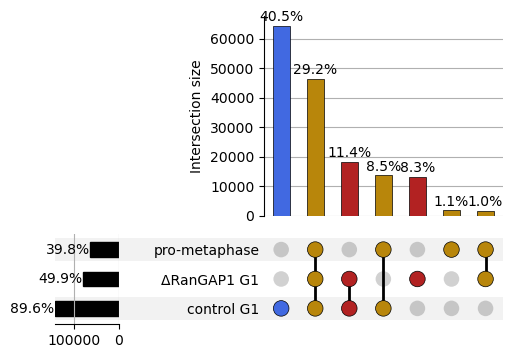

In [73]:
from matplotlib import pyplot as plt
import pandas as pd
from upsetplot import plot, from_indicators
from upsetplot import generate_counts, UpSet

updata=union[['score_M','score_mG','score_pG']].copy()

updata['pro-metaphase']=updata['score_M']
updata['control G1']=updata['score_mG']
updata['ΔRanGAP1 G1']=updata['score_pG']

updata=updata[['pro-metaphase','control G1','ΔRanGAP1 G1']]
updata.replace(0, np.nan, inplace=True)

updata=from_indicators(indicators=pd.notna, data=updata)
upset = UpSet(updata,sort_by='cardinality',show_percentages=True)
upset.style_subsets(present=['pro-metaphase'], facecolor="darkgoldenrod", label=None,edgecolor='black',linewidth=0.5)
upset.style_subsets(present=['control G1'], absent=['pro-metaphase','ΔRanGAP1 G1'],facecolor="royalblue", label=None,edgecolor='black',linewidth=0.5)
upset.style_subsets(present=['ΔRanGAP1 G1'], absent=['pro-metaphase'],facecolor="firebrick", label=None,edgecolor='black',linewidth=0.5)
upset.plot(fig = plt.figure(figsize=(13, 13)))
#plt.suptitle("ATAC peaks")
#plt.savefig('/atacpeaks_all_upset_colours.pdf', bbox_inches = 'tight', dpi = 300)


In [74]:
import bioframe as bf

cyt=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240708_enrich/pCyto_2X_enrichment.pixel_derived.signal_fullpeaks.bed',
               sep='\t',names=['chrom','start','end','sizemaybe'])
cyt['start_ext']=cyt['start']-5000
cyt['end_ext']=cyt['end']+5000
g1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240708_enrich/5hr_2X_enrichment.pixel_derived.signal_fullpeaks.bed',
               sep='\t',names=['chrom','start','end','sizemaybe'])
g1['start_ext']=g1['start']-5000
g1['end_ext']=g1['end']+5000

cyt_g1=bf.overlap(g1,cyt,cols1=['chrom','start_ext','end_ext'],cols2=['chrom','start_ext','end_ext']).drop_duplicates().dropna(subset='start_')
cyt_g1=cyt_g1[['chrom','start','end','sizemaybe']]
g1_spec=bf.overlap(g1,cyt,cols1=['chrom','start_ext','end_ext'],cols2=['chrom','start_ext','end_ext'])
g1_spec=g1_spec[g1_spec['start_'].isnull()].drop_duplicates()
g1_spec=g1_spec[['chrom','start','end','sizemaybe']]

print(len(g1),len(cyt_g1),len(g1_spec))
g1_spec


2105 759 1390


,chrom,start,end,sizemaybe
2,chr1,6590000,6620000,30000
3,chr1,7760000,7790000,30000
5,chr1,8080000,8110000,30000
6,chr1,9130000,9160000,30000
8,chr1,19890000,19920000,30000
...,...,...,...,...
2136,chr21,39610000,39650000,40000
2138,chr22,28830000,28860000,30000
2139,chr22,28890000,28920000,30000
2147,chr22,40000000,40050000,50000


In [75]:
union_IDs_5=bf.overlap(union, g1_spec, how='left').drop_duplicates(subset=['chrom','start','end']).dropna()
union_IDs_cyto=bf.overlap(union, cyt_g1,how='left').drop_duplicates(subset=['chrom','start','end']).dropna()
union_IDs=bf.overlap(union, g1,how='left').drop_duplicates(subset=['chrom','start','end']).dropna()

print(len(union_IDs_5),len(union_IDs_cyto))
union_IDs


7887 7594


,chrom,start,end,score_M,score_mG,score_pG,chrom_,start_,end_,sizemaybe_,start_ext_,end_ext_
46,chr20,18279312,18279628,0.0,65.0,0.0,chr20,18260000,18290000,30000.0,18255000.0,18295000.0
47,chr20,18272520,18272764,0.0,313.0,0.0,chr20,18260000,18290000,30000.0,18255000.0,18295000.0
48,chr20,18263263,18264156,0.0,1084.0,314.0,chr20,18260000,18290000,30000.0,18255000.0,18295000.0
81,chr9,112360232,112360692,0.0,237.0,0.0,chr9,112340000,112370000,30000.0,112335000.0,112375000.0
91,chr9,112348341,112348979,0.0,388.0,175.0,chr9,112340000,112370000,30000.0,112335000.0,112375000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159525,chr15,49169871,49171029,1092.0,1257.0,1086.0,chr15,49130000,49170000,40000.0,49125000.0,49175000.0
159526,chr3,185807568,185808472,1093.0,1255.0,743.0,chr3,185760000,185850000,90000.0,185755000.0,185855000.0
159533,chr21,14382384,14384213,1110.0,1267.0,1212.0,chr21,14350000,14410000,60000.0,14345000.0,14415000.0
159538,chr7,25861697,25863276,1117.0,1121.0,1024.0,chr7,25830000,25890000,60000.0,25825000.0,25895000.0


/home/allana.schooley-umw/miniconda3/envs/open2c2v2/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/allana.schooley-umw/miniconda3/envs/open2c2v2/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

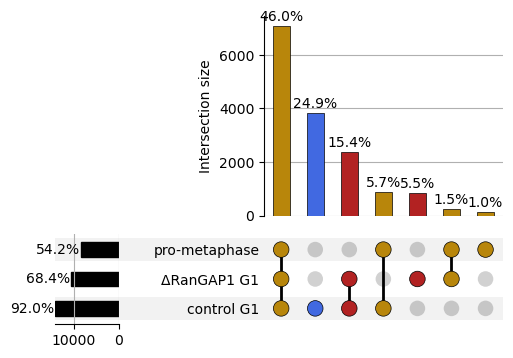

In [76]:
from matplotlib import pyplot as plt
import pandas as pd
from upsetplot import plot, from_indicators
from upsetplot import generate_counts, UpSet

updata=union_IDs[['score_M','score_mG','score_pG']].copy()
updata['pro-metaphase']=updata['score_M']
updata['control G1']=updata['score_mG']
updata['ΔRanGAP1 G1']=updata['score_pG']
updata=updata[['pro-metaphase','control G1','ΔRanGAP1 G1']]
updata.replace(0, np.nan, inplace=True)

updata=from_indicators(indicators=pd.notna, data=updata)
upset = UpSet(updata,sort_by='cardinality',show_percentages=True)
upset.style_subsets(present=['pro-metaphase'], facecolor="darkgoldenrod", label=None,edgecolor='black',linewidth=0.5)
upset.style_subsets(present=['control G1'], absent=['pro-metaphase','ΔRanGAP1 G1'],facecolor="royalblue", label=None,edgecolor='black',linewidth=0.5)
upset.style_subsets(present=['ΔRanGAP1 G1'], absent=['pro-metaphase'],facecolor="firebrick", label=None,edgecolor='black',linewidth=0.5)

upset.plot(fig = plt.figure(figsize=(13, 13)))
#plt.suptitle("ATAC peaks")
#plt.savefig('/atacpeaks_all_atID_upset_colours_new.pdf', bbox_inches = 'tight', dpi = 300)


# Coverage at peaks


In [77]:
Mp=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/coverage/cov_allpeaks/Mp.out',sep='\t')
mGp=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/coverage/cov_allpeaks/mGp.out',sep='\t')
pGp=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/coverage/cov_allpeaks/pGp.out',sep='\t')
Mp


,chrom,start,end,cov_cov
0,chr1,826630,828066,7350
1,chr1,858687,859056,212
2,chr1,866171,866515,177
3,chr1,869443,870290,3679
4,chr1,875202,875737,321
...,...,...,...,...
159067,chrY,21845260,21846134,944
159068,chrY,22263963,22264219,116
159069,chrY,22265642,22266678,2556
159070,chrY,22370661,22371030,944


In [78]:
union=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/union_R1R3_narrowPeaks_bothfirst_pmit.sorted',sep='\t',
                  names=['chrom','start','end','score_Mp','score_mGp','score_pGp'])
#since the file were sorted and inputs were identical can simply add columns.  otherwise need to merge
union['count_Mp']=Mp['cov_cov']
union['count_mGp']=mGp['cov_cov']
union['count_pGp']=pGp['cov_cov']
union


,chrom,start,end,score_Mp,score_mGp,score_pGp,count_Mp,count_mGp,count_pGp
0,chr1,826630,828066,616.0,723.0,734.0,7350,3597,5620.0
1,chr1,858687,859056,0.0,201.0,0.0,212,239,73.0
2,chr1,866171,866515,0.0,274.0,0.0,177,240,61.0
3,chr1,869443,870290,598.0,558.0,642.0,3679,1629,1804.0
4,chr1,875202,875737,0.0,82.0,0.0,321,222,204.0
...,...,...,...,...,...,...,...,...,...
159067,chrY,21845260,21846134,0.0,794.0,146.0,944,1363,193.0
159068,chrY,22263963,22264219,0.0,216.0,0.0,116,165,23.0
159069,chrY,22265642,22266678,769.0,1007.0,467.0,2556,2369,745.0
159070,chrY,22370661,22371030,479.0,734.0,153.0,944,1173,154.0


In [79]:
#norm should be total reads
  # 377672060 mGp.reducedchroms.p4m5_ends.sorted.bed
  # 616586437 Mp.reducedchroms.p4m5_ends.sorted.bed
  # 337827437 pGp.reducedchroms.p4m5_ends.sorted.bed

norm_M=1000000/616586437
norm_mG=1000000/377672060
norm_pG=1000000/337827437

union['count_Mp_norm']=union['count_Mp']*norm_M
union['count_mGp_norm']=union['count_mGp']*norm_mG
union['count_pGp_norm']=union['count_pGp']*norm_pG

print(norm_M,norm_mG,norm_pG)

union


0.0016218326255528711 0.0026477997869368466 0.0029600911307863962


,chrom,start,end,score_Mp,score_mGp,score_pGp,count_Mp,count_mGp,count_pGp,count_Mp_norm,count_mGp_norm,count_pGp_norm
0,chr1,826630,828066,616.0,723.0,734.0,7350,3597,5620.0,11.920470,9.524136,16.635712
1,chr1,858687,859056,0.0,201.0,0.0,212,239,73.0,0.343829,0.632824,0.216087
2,chr1,866171,866515,0.0,274.0,0.0,177,240,61.0,0.287064,0.635472,0.180566
3,chr1,869443,870290,598.0,558.0,642.0,3679,1629,1804.0,5.966722,4.313266,5.340004
4,chr1,875202,875737,0.0,82.0,0.0,321,222,204.0,0.520608,0.587812,0.603859
...,...,...,...,...,...,...,...,...,...,...,...,...
159067,chrY,21845260,21846134,0.0,794.0,146.0,944,1363,193.0,1.531010,3.608951,0.571298
159068,chrY,22263963,22264219,0.0,216.0,0.0,116,165,23.0,0.188133,0.436887,0.068082
159069,chrY,22265642,22266678,769.0,1007.0,467.0,2556,2369,745.0,4.145404,6.272638,2.205268
159070,chrY,22370661,22371030,479.0,734.0,153.0,944,1173,154.0,1.531010,3.105869,0.455854


# overlap IDs


In [80]:
cyt=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240708_enrich/pCyto_2X_enrichment.pixel_derived.signal_fullpeaks.bed',
               sep='\t',names=['chrom','start','end','sizemaybe'])
cyt['start_ext']=cyt['start']-5000
cyt['end_ext']=cyt['end']+5000
g1=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240708_enrich/5hr_2X_enrichment.pixel_derived.signal_fullpeaks.bed',
               sep='\t',names=['chrom','start','end','sizemaybe'])
g1['start_ext']=g1['start']-5000
g1['end_ext']=g1['end']+5000

cyt_g1=bf.overlap(g1,cyt,cols1=['chrom','start_ext','end_ext'],cols2=['chrom','start_ext','end_ext']).drop_duplicates(['chrom','start_ext','end_ext']).dropna()
g1_spec=bf.overlap(g1,cyt,cols1=['chrom','start_ext','end_ext'],cols2=['chrom','start_ext','end_ext'])
g1_spec=g1_spec[g1_spec['start_'].isnull()].drop_duplicates(['chrom','start_ext','end_ext'])
g1_spec


,chrom,start,end,sizemaybe,start_ext,end_ext,chrom_,start_,end_,sizemaybe_,start_ext_,end_ext_
2,chr1,6590000,6620000,30000,6585000,6625000,None,NaN,NaN,NaN,<NA>,<NA>
3,chr1,7760000,7790000,30000,7755000,7795000,None,NaN,NaN,NaN,<NA>,<NA>
5,chr1,8080000,8110000,30000,8075000,8115000,None,NaN,NaN,NaN,<NA>,<NA>
6,chr1,9130000,9160000,30000,9125000,9165000,None,NaN,NaN,NaN,<NA>,<NA>
8,chr1,19890000,19920000,30000,19885000,19925000,None,NaN,NaN,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
2136,chr21,39610000,39650000,40000,39605000,39655000,None,NaN,NaN,NaN,<NA>,<NA>
2138,chr22,28830000,28860000,30000,28825000,28865000,None,NaN,NaN,NaN,<NA>,<NA>
2139,chr22,28890000,28920000,30000,28885000,28925000,None,NaN,NaN,NaN,<NA>,<NA>
2147,chr22,40000000,40050000,50000,39995000,40055000,None,NaN,NaN,NaN,<NA>,<NA>


In [81]:
uID5=bf.overlap(union,g1_spec,cols2=['chrom','start_ext','end_ext']).dropna(subset='start_ext_').drop_duplicates(['chrom','start','end'])
uIDc=bf.overlap(union,cyt_g1,cols2=['chrom','start_ext','end_ext']).dropna(subset='start_ext_').drop_duplicates(['chrom','start','end'])
uID=bf.overlap(union,g1,cols2=['chrom','start_ext','end_ext']).dropna(subset='start_ext_').drop_duplicates(['chrom','start','end'])
uIDc


,chrom,start,end,score_Mp,score_mGp,score_pGp,count_Mp,count_mGp,count_pGp,count_Mp_norm,...,end_,sizemaybe_,start_ext_,end_ext_,chrom__,start__,end__,sizemaybe__,start_ext__,end_ext__
27,chr1,1005040,1005664,0.0,92.0,0.0,1807,1539,521.0,2.930652,...,1040000.0,30000.0,1005000,1045000,chr1,980000.0,1060000.0,80000.0,975000,1065000
28,chr1,1005751,1007061,355.0,503.0,592.0,8854,7360,7190.0,14.359706,...,1040000.0,30000.0,1005000,1045000,chr1,980000.0,1060000.0,80000.0,975000,1065000
29,chr1,1013202,1014702,353.0,364.0,503.0,17335,9399,7878.0,28.114469,...,1040000.0,30000.0,1005000,1045000,chr1,980000.0,1060000.0,80000.0,975000,1065000
30,chr1,1014809,1015185,0.0,158.0,104.0,2693,1527,805.0,4.367595,...,1040000.0,30000.0,1005000,1045000,chr1,980000.0,1060000.0,80000.0,975000,1065000
31,chr1,1019220,1021796,139.0,175.0,188.0,50483,14644,10768.0,81.874976,...,1040000.0,30000.0,1005000,1045000,chr1,980000.0,1060000.0,80000.0,975000,1065000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155902,chr9,137577765,137579579,443.0,490.0,640.0,18454,12116,9076.0,29.929299,...,137610000.0,30000.0,137575000,137615000,chr9,137580000.0,137630000.0,50000.0,137575000,137635000
155903,chr9,137589356,137591497,431.0,498.0,514.0,23265,11566,9678.0,37.731936,...,137610000.0,30000.0,137575000,137615000,chr9,137580000.0,137630000.0,50000.0,137575000,137635000
155904,chr9,137604137,137607038,394.0,426.0,470.0,59329,18048,16234.0,96.221708,...,137610000.0,30000.0,137575000,137615000,chr9,137580000.0,137630000.0,50000.0,137575000,137635000
155905,chr9,137610954,137611280,0.0,165.0,0.0,2308,2685,643.0,3.743190,...,137610000.0,30000.0,137575000,137615000,chr9,137580000.0,137630000.0,50000.0,137575000,137635000


# plotting coverage


In [82]:
#union3=union[(union['score_mGp']>0)&(union['score_Mp']>0)]
union2=union[(union['score_mGp']>0)]
union_forplot=union2[union2['count_pGp_norm']>0]
print(len(union),len(union_forplot),len(uID))


159072 142542 17336


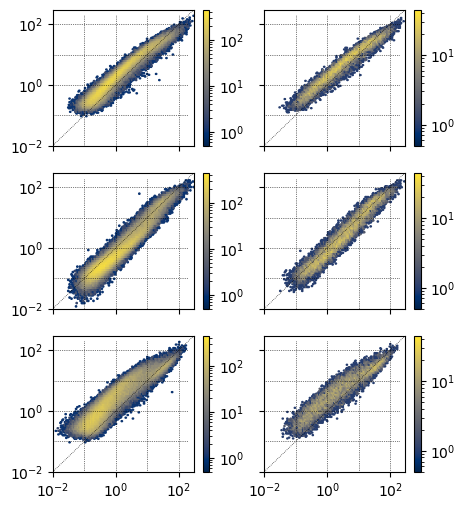

In [83]:
#u=union
i=uID[(uID['score_mGp']>0)]
u=union_forplot
r=len(i)/len(u)

#u=union

fig, ((ax1, ax2),(ax3,ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(5, 6),sharey=True,sharex=True)

hb1 = ax1.hexbin(u['count_Mp_norm'],u['count_mGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=450,vmin=0.5)
hb2 = ax3.hexbin(u['count_Mp_norm'],u['count_pGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=450,vmin=0.5)
hb3 = ax5.hexbin(u['count_pGp_norm'],u['count_mGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=450,vmin=0.5)

hb4 = ax2.hexbin(i['count_Mp_norm'],i['count_mGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=45,vmin=0.5)
hb5 = ax4.hexbin(i['count_Mp_norm'],i['count_pGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=45,vmin=0.5)
hb6 = ax6.hexbin(i['count_pGp_norm'],i['count_mGp_norm'],gridsize=100,cmap='cividis',edgecolors='face',bins='log',xscale='log',yscale='log',vmax=45,vmin=0.5)



axmin = 0.01
axmax = 300

for ax in [ax1, ax2,ax3,ax4,ax5,ax6]:
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.axis([axmin, axmax, axmin, axmax])
    ax.plot([axmin, axmax],[axmin, axmax],color="k",lw=0.5, ls=':')
    ax.vlines([0.1,1,10,100],0,200,lw=0.5, ls=':',color='k')
    ax.hlines([0.1,1,10,100],0,200,lw=0.5, ls=':',color='k')
for ax in [ax1, ax3,ax5]:
    cb = fig.colorbar(hb1, ax=ax)
for ax in [ax2, ax4,ax6]:
    cb = fig.colorbar(hb4, ax=ax)
    
#plt.savefig(f'/coverage_hex_jul24_G1.pdf', bbox_inches = 'tight', dpi = 300)



# Deseq2

<AxesSubplot: >

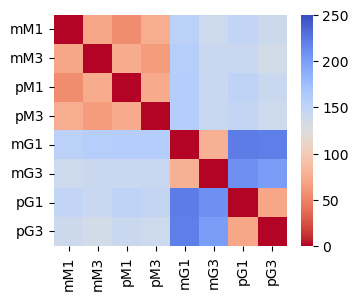

In [84]:
de=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/unionmat_deseq2_vstT.txt',sep='\t')

fig, ax1 = plt.subplots(1, 1,figsize=(3.75, 3))

sns.heatmap(de,cmap="coolwarm_r",ax=ax1,vmin=0, vmax=250)

#plt.savefig(f'/deseq2.pdf', bbox_inches = 'tight', dpi = 300)



# cCREs at ATAC peaks

In [85]:
union=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/nfatac_wbl_R1R3/result/filtered/macs3peaks/union_R1R3_narrowPeaks_bothfirst_pmit',
                  sep='\t',names=['chrom','start','end','score_M','score_mG','score_pG'])

uniong1=union[union['score_mG']>0]
uniong2=uniong1[(uniong1['score_pG']>0)&(uniong1['score_M']>0)]
print(len(union),len(uniong1),len(uniong2))
union


159072 142543 46447


,chrom,start,end,score_M,score_mG,score_pG
0,chrY,26319533,26319755,0.0,342.0,0.0
1,chr20,18090847,18091143,0.0,61.0,0.0
2,chr20,18090171,18090345,0.0,77.0,0.0
3,chr20,18077179,18077421,0.0,64.0,0.0
4,chr20,18074675,18075141,0.0,112.0,0.0
...,...,...,...,...,...,...
159067,chr16,22436440,22437926,1211.0,1003.0,1108.0
159068,chr16,15153921,15155441,1234.0,960.0,1064.0
159069,chr15,90497848,90498397,1250.0,1404.0,654.0
159070,chr9,96883802,96884970,1254.0,1433.0,1168.0


In [86]:
cre=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/cres/all_cres_encodestyle_pMunion_95atac_95rest.bed', sep='\t')

cre


,chrom,start,end,label,1,2,3,4,5,6,...,Z_ctcf,chrom_,start_,end_,label_,score_,strand_,name_,distance,name
0,chr1,827342,827691,EH38D2115342,NaN,NaN,NaN,NaN,NaN,NaN,...,0.175482,chr1,827522,827522,ENST00000473798.1,.,-,ENSG00000225880.5,0,pls
1,chr1,904594,904931,EH38D2115410,NaN,NaN,NaN,NaN,NaN,NaN,...,1.881979,chr1,904834,904834,ENST00000607769.1,.,+,ENSG00000272438.1,0,pls
2,chr1,959147,959495,EH38D2115511,NaN,NaN,NaN,NaN,NaN,NaN,...,0.822329,chr1,959290,959290,ENST00000327044.6,.,-,ENSG00000188976.10,0,pls
3,chr1,960392,960733,EH38D2115515,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.000000,chr1,960587,960587,ENST00000338591.7,.,+,ENSG00000187961.13,0,pls
4,chr1,966292,966617,EH38D2115523,NaN,NaN,NaN,NaN,NaN,NaN,...,1.973521,chr1,966497,966497,ENST00000379410.7,.,+,ENSG00000187583.10,0,pls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165062,chrY,21602623,21602968,EH38D4327289,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.656758,chrY,21594666,21594666,ENST00000330337.2,.,-,ENSG00000184991.2,7957,justopen
165063,chrY,21840091,21840414,EH38D4327334,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.000000,chrY,21818218,21818218,ENST00000620993.1,.,-,ENSG00000277519.1,21873,justopen
165064,chrY,21845516,21845839,EH38D4327337,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.000000,chrY,21871331,21871331,ENST00000414540.1,.,+,ENSG00000229725.1,25492,justopen
165065,chrY,22370653,22371001,EH38D4327351,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.468444,chrY,22402568,22402568,ENST00000433481.1,.,-,ENSG00000237902.1,31567,justopen


In [87]:
aaa=bf.overlap(uniong1,cre, how='left')
aaa.groupby('name_').count()


,chrom,start,end,score_M,score_mG,score_pG,chrom_,start_,end_,label_,...,Z_k27ac_,Z_ctcf_,chrom__,start__,end__,label__,score__,strand__,name__,distance_
name_,,,,,,,,,,,,,,,,,,,,,
ctcf,11216,11216,11216,11216,11216,11216,11216,11216,11216,11216,...,11216,11216,11216,11216,11216,11216,11216,11216,11216,11216
dels,24159,24159,24159,24159,24159,24159,24159,24159,24159,24159,...,24159,24159,24159,24159,24159,24159,24159,24159,24159,24159
justopen,62861,62861,62861,62861,62861,62861,62861,62861,62861,62861,...,62861,62861,62861,62861,62861,62861,62861,62861,62861,62861
nels,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,...,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101
openk4,8318,8318,8318,8318,8318,8318,8318,8318,8318,8318,...,8318,8318,8318,8318,8318,8318,8318,8318,8318,8318
pels,17588,17588,17588,17588,17588,17588,17588,17588,17588,17588,...,17588,17588,17588,17588,17588,17588,17588,17588,17588,17588
pls,22103,22103,22103,22103,22103,22103,22103,22103,22103,22103,...,22103,22103,22103,22103,22103,22103,22103,22103,22103,22103


In [88]:
def cat1(aaa):
    if aaa['name_']=='justopen':
        return 'just open'
    elif aaa['name_']=='ctcf':
        return 'ctcf'
    elif (aaa['name_']=='nels')|(aaa['name_']=='pels'):
        return 'prox. enh'
    elif aaa['name_']=='dels':
        return 'dist. enh'
    elif aaa['name_']=='pls':
        return 'promoter-like'
    elif aaa['name_']=='openk4':
        return 'open K4me3'
    else:
        return 'no cre'

aaa['cre']=aaa.apply(cat1, axis=1) 

aaa


,chrom,start,end,score_M,score_mG,score_pG,chrom_,start_,end_,label_,...,chrom__,start__,end__,label__,score__,strand__,name__,distance_,name_,cre
0,chrY,26319533,26319755,0.0,342.0,0.0,chrY,26319536,26319816,EH38D4327362,...,chrY,26354418.0,26354418.0,ENST00000367272.4,.,-,ENSG00000229238.3,34602.0,justopen,just open
1,chr20,18090847,18091143,0.0,61.0,0.0,None,<NA>,<NA>,None,...,None,NaN,NaN,None,None,None,None,NaN,None,no cre
2,chr20,18090171,18090345,0.0,77.0,0.0,None,<NA>,<NA>,None,...,None,NaN,NaN,None,None,None,None,NaN,None,no cre
3,chr20,18077179,18077421,0.0,64.0,0.0,None,<NA>,<NA>,None,...,None,NaN,NaN,None,None,None,None,NaN,None,no cre
4,chr20,18074675,18075141,0.0,112.0,0.0,None,<NA>,<NA>,None,...,None,NaN,NaN,None,None,None,None,NaN,None,no cre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204611,chr16,15153921,15155441,1234.0,960.0,1064.0,chr16,15154796,15155144,EH38D2848055,...,chr16,15154903.0,15154903.0,ENST00000552015.1,.,+,ENSG00000257391.1,0.0,pls,promoter-like
204612,chr15,90497848,90498397,1250.0,1404.0,654.0,chr15,90497944,90498294,EH38D2823997,...,chr15,90529925.0,90529925.0,ENST00000420329.6,.,+,ENSG00000140577.15,31631.0,justopen,just open
204613,chr9,96883802,96884970,1254.0,1433.0,1168.0,chr9,96883987,96884312,EH38D4215738,...,chr9,96910076.0,96910076.0,ENST00000602494.1,.,+,ENSG00000269907.1,25764.0,justopen,just open
204614,chr9,96883802,96884970,1254.0,1433.0,1168.0,chr9,96884440,96884779,EH38D4215739,...,chr9,96910076.0,96910076.0,ENST00000602494.1,.,+,ENSG00000269907.1,25297.0,justopen,just open


In [89]:
def cre_score(aaa):
    if (aaa['cre'] == 'promoter-like'):
        return 6
    elif (aaa['cre'] == 'prox. enh') :
        return 5
    elif (aaa['cre'] == 'dist. enh'):
        return 4
    elif (aaa['cre'] == 'open K4me3'):
        return 3
    elif (aaa['cre'] == 'ctcf'):
        return 2
    elif (aaa['cre'] == 'just open'):
        return 1
    else:
        return 0

aaa['cre_score']=aaa.apply(cre_score, axis=1) 
aaa.groupby('cre_score').count()


,chrom,start,end,score_M,score_mG,score_pG,chrom_,start_,end_,label_,...,chrom__,start__,end__,label__,score__,strand__,name__,distance_,name_,cre
cre_score,,,,,,,,,,,,,,,,,,,,,
0,57270,57270,57270,57270,57270,57270,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57270
1,62861,62861,62861,62861,62861,62861,62861,62861,62861,62861,...,62861,62861,62861,62861,62861,62861,62861,62861,62861,62861
2,11216,11216,11216,11216,11216,11216,11216,11216,11216,11216,...,11216,11216,11216,11216,11216,11216,11216,11216,11216,11216
3,8318,8318,8318,8318,8318,8318,8318,8318,8318,8318,...,8318,8318,8318,8318,8318,8318,8318,8318,8318,8318
4,24159,24159,24159,24159,24159,24159,24159,24159,24159,24159,...,24159,24159,24159,24159,24159,24159,24159,24159,24159,24159
5,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689,...,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689
6,22103,22103,22103,22103,22103,22103,22103,22103,22103,22103,...,22103,22103,22103,22103,22103,22103,22103,22103,22103,22103


In [90]:
#one cre/peak
aaa=aaa.fillna(0).sort_values('cre_score').drop_duplicates(subset=['chrom', 'start','end'], keep='last')
aaa=aaa[['chrom','start','end','score_M','score_mG','score_pG','cre','cre_score']]

#try multiple CREs per peak
#aaa=aaa.fillna(0)
# aaa=aaa[['chrom','start','end','score_M','score_mG','score_pG','cre','cre_score']]

#aaa.to_csv('/home/allana.schooley-umw/as38w/Ranger/cres/all_cres_atpeaks_pMunion_NEWatac_k2785_rest95.bed',sep='\t')

print(len(aaa[aaa['cre_score']==6]))
aaa


10271


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score
54,chr20,18779094,18779327,0.0,224.0,0.0,no cre,0
55,chr20,17715072,17715339,0.0,39.0,0.0,no cre,0
56,chr20,16861815,16862036,0.0,114.0,0.0,no cre,0
57,chr20,16821464,16821717,0.0,253.0,0.0,no cre,0
58,chr20,16804022,16804277,0.0,168.0,83.0,no cre,0
...,...,...,...,...,...,...,...,...
120152,chr17,7350933,7352742,282.0,332.0,411.0,promoter-like,6
204615,chr1,206202844,206203880,1373.0,1373.0,1302.0,promoter-like,6
5,chr20,18058651,18059493,0.0,579.0,351.0,promoter-like,6
204608,chr7,124929304,124930380,1189.0,1231.0,1237.0,promoter-like,6


In [91]:
enh=aaa[(aaa['cre_score']==4)|(aaa['cre_score']==5)]
enh=enh[['chrom','start','end','score_M','score_mG','score_pG','cre_score']]

prom=aaa[aaa['cre_score']==6]
prom=prom[['chrom','start','end','score_M','score_mG','score_pG','cre_score']]

print(len(enh),len(prom))
enh


16196 10271


,chrom,start,end,score_M,score_mG,score_pG,cre_score
59951,chr10,29104588,29106065,0.0,315.0,0.0,4
60069,chr14,67986450,67987156,0.0,280.0,220.0,4
60052,chr14,67990473,67991230,0.0,168.0,95.0,4
107460,chr18,35456066,35456927,209.0,275.0,220.0,4
107446,chr7,47602340,47602621,209.0,242.0,311.0,4
...,...,...,...,...,...,...,...
120160,chr1,24416504,24417360,282.0,458.0,413.0,5
98641,chr8,101453899,101454560,155.0,240.0,213.0,5
98657,chr22,35301621,35301959,155.0,170.0,110.0,5
98676,chr4,1719702,1720915,155.0,143.0,148.0,5


In [92]:
IDa=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240314_newIDs/5hr_2X_enrichment.pixel_derived.signal_peaks.bed',sep='\t')
IDa['peak_start_ext']=IDa['peak_start']-5000
IDa['peak_end_ext']=IDa['peak_end']+5000
IDa=IDa.reset_index(drop=True)
IDa=IDa.reset_index().rename(columns={'index':'id_index'})

IDa


,id_index,chrom,start,end,cluster,size,valency,peak_start,peak_end,size.1,peak_start_ext,peak_end_ext
0,0,chr1,1020000,1030000,0,30000,3,1010000,1040000,30000,1005000,1045000
1,1,chr1,1900000,1910000,1,30000,2,1890000,1920000,30000,1885000,1925000
2,2,chr1,6600000,6610000,2,30000,2,6590000,6620000,30000,6585000,6625000
3,3,chr1,7770000,7780000,3,30000,2,7760000,7790000,30000,7755000,7795000
4,4,chr1,7990000,8000000,4,40000,2,7980000,8020000,40000,7975000,8025000
...,...,...,...,...,...,...,...,...,...,...,...,...
2100,2100,chr22,45170000,45180000,2100,50000,2,45140000,45190000,50000,45135000,45195000
2101,2101,chr22,46070000,46080000,2101,130000,11,46020000,46150000,130000,46015000,46155000
2102,2102,chr22,46750000,46760000,2102,30000,2,46740000,46770000,30000,46735000,46775000
2103,2103,chr22,49940000,49950000,2103,70000,5,49920000,49990000,70000,49915000,49995000


In [93]:
id_cre=bf.overlap(aaa,IDa,cols2=['chrom','peak_start_ext','peak_end_ext'],suffixes=['','_id'],how='left').dropna()
id_cre


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,start_id,end_id,cluster_id,size_id,valency_id,peak_start_id,peak_end_id,size.1_id,peak_start_ext_id,peak_end_ext_id
31,chr9,112174533,112175583,0.0,291.0,378.0,just open,1,1295.0,chr9,112150000.0,112160000.0,1295.0,30000.0,4.0,112140000.0,112170000.0,30000.0,112135000,112175000
41,chr20,18279312,18279628,0.0,65.0,0.0,no cre,0,2045.0,chr20,18270000.0,18280000.0,2045.0,30000.0,3.0,18260000.0,18290000.0,30000.0,18255000,18295000
42,chr20,18272520,18272764,0.0,313.0,0.0,just open,1,2045.0,chr20,18270000.0,18280000.0,2045.0,30000.0,3.0,18260000.0,18290000.0,30000.0,18255000,18295000
43,chr20,18263263,18264156,0.0,1084.0,314.0,ctcf,2,2045.0,chr20,18270000.0,18280000.0,2045.0,30000.0,3.0,18260000.0,18290000.0,30000.0,18255000,18295000
69,chr9,112360232,112360692,0.0,237.0,0.0,no cre,0,1296.0,chr9,112350000.0,112360000.0,1296.0,30000.0,2.0,112340000.0,112370000.0,30000.0,112335000,112375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143023,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,571.0,chr3,185800000.0,185810000.0,571.0,90000.0,16.0,185760000.0,185850000.0,90000.0,185755000,185855000
143030,chr21,14382384,14384213,1110.0,1267.0,1212.0,promoter-like,6,2061.0,chr21,14370000.0,14380000.0,2061.0,60000.0,4.0,14350000.0,14410000.0,60000.0,14345000,14415000
143035,chr7,25861697,25863276,1117.0,1121.0,1024.0,open K4me3,3,1057.0,chr7,25860000.0,25870000.0,1057.0,60000.0,11.0,25830000.0,25890000.0,60000.0,25825000,25895000
143041,chr4,74682349,74683776,1122.0,1280.0,683.0,dist. enh,4,645.0,chr4,74640000.0,74650000.0,645.0,80000.0,10.0,74600000.0,74680000.0,80000.0,74595000,74685000


In [94]:
five=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240314_newIDs/5hr_2X_enrichment.pixel_derived.signal_peaks.bed',sep='\t')
cyto=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240314_newIDs/pCyto_2X_enrichment.pixel_derived.signal_peaks.bed',sep='\t')
all_cyto=bf.overlap(IDa,cyto,cols1=['chrom','peak_start','peak_end'],cols2=['chrom','peak_start','peak_end']).dropna().drop_duplicates(['chrom','start','end'])
all_cyto=all_cyto[['chrom','start','end','cluster','size','valency','peak_start','peak_end','size.1']]
all_cyto
#698

,chrom,start,end,cluster,size,valency,peak_start,peak_end,size.1
0,chr1,1020000,1030000,0,30000,3,1010000,1040000,30000
1,chr1,1900000,1910000,1,30000,2,1890000,1920000,30000
4,chr1,7990000,8000000,4,40000,2,7980000,8020000,40000
7,chr1,16150000,16160000,7,70000,13,16120000,16190000,70000
14,chr1,28520000,28530000,14,50000,4,28500000,28550000,50000
...,...,...,...,...,...,...,...,...,...
2136,chr22,45170000,45180000,2100,50000,2,45140000,45190000,50000
2137,chr22,46070000,46080000,2101,130000,11,46020000,46150000,130000
2138,chr22,46750000,46760000,2102,30000,2,46740000,46770000,30000
2139,chr22,49940000,49950000,2103,70000,5,49920000,49990000,70000


In [95]:
# IDc=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/nativecomps/240314_newIDs/pCyto_2X_enrichment.pixel_derived.signal_peaks.bed',sep='\t')
IDc=all_cyto
IDc['peak_start_ext']=IDc['peak_start']-5000
IDc['peak_end_ext']=IDc['peak_end']+5000
IDc=IDc.reset_index(drop=True)
IDc=IDc.reset_index().rename(columns={'index':'id_index'})

# ID_peaks=bf.overlap(IDa,uniong1,how='left',suffixes=['','_atac'])
# ID_peaks
IDc


,id_index,chrom,start,end,cluster,size,valency,peak_start,peak_end,size.1,peak_start_ext,peak_end_ext
0,0,chr1,1020000,1030000,0,30000,3,1010000,1040000,30000,1005000,1045000
1,1,chr1,1900000,1910000,1,30000,2,1890000,1920000,30000,1885000,1925000
2,2,chr1,7990000,8000000,4,40000,2,7980000,8020000,40000,7975000,8025000
3,3,chr1,16150000,16160000,7,70000,13,16120000,16190000,70000,16115000,16195000
4,4,chr1,28520000,28530000,14,50000,4,28500000,28550000,50000,28495000,28555000
...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,chr22,45170000,45180000,2100,50000,2,45140000,45190000,50000,45135000,45195000
694,694,chr22,46070000,46080000,2101,130000,11,46020000,46150000,130000,46015000,46155000
695,695,chr22,46750000,46760000,2102,30000,2,46740000,46770000,30000,46735000,46775000
696,696,chr22,49940000,49950000,2103,70000,5,49920000,49990000,70000,49915000,49995000


In [96]:
id_cre_c=bf.overlap(aaa,IDc,cols2=['chrom','peak_start_ext','peak_end_ext'],suffixes=['','_id'],how='left').dropna()
id_cre_c


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,start_id,end_id,cluster_id,size_id,valency_id,peak_start_id,peak_end_id,size.1_id,peak_start_ext_id,peak_end_ext_id
255,chr20,10708219,10709212,0.0,323.0,0.0,dist. enh,4,674.0,chr20,10660000.0,10670000.0,2042.0,70000.0,10.0,10640000.0,10710000.0,70000.0,10635000,10715000
256,chr20,10670695,10670949,0.0,62.0,0.0,dist. enh,4,674.0,chr20,10660000.0,10670000.0,2042.0,70000.0,10.0,10640000.0,10710000.0,70000.0,10635000,10715000
257,chr20,10664319,10665432,0.0,166.0,101.0,dist. enh,4,674.0,chr20,10660000.0,10670000.0,2042.0,70000.0,10.0,10640000.0,10710000.0,70000.0,10635000,10715000
258,chr20,10661520,10661815,0.0,86.0,0.0,dist. enh,4,674.0,chr20,10660000.0,10670000.0,2042.0,70000.0,10.0,10640000.0,10710000.0,70000.0,10635000,10715000
259,chr20,10660688,10660994,0.0,319.0,159.0,dist. enh,4,674.0,chr20,10660000.0,10670000.0,2042.0,70000.0,10.0,10640000.0,10710000.0,70000.0,10635000,10715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142798,chr21,37338463,37339506,1025.0,1068.0,1086.0,just open,1,683.0,chr21,37350000.0,37360000.0,2080.0,60000.0,7.0,37330000.0,37390000.0,60000.0,37325000,37395000
142813,chr14,52706170,52707801,1035.0,1044.0,1113.0,promoter-like,6,559.0,chr14,52710000.0,52720000.0,1730.0,80000.0,14.0,52670000.0,52750000.0,80000.0,52665000,52755000
142865,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,185.0,chr3,185800000.0,185810000.0,571.0,90000.0,16.0,185760000.0,185850000.0,90000.0,185755000,185855000
142877,chr7,25861697,25863276,1117.0,1121.0,1024.0,open K4me3,3,342.0,chr7,25860000.0,25870000.0,1057.0,60000.0,11.0,25830000.0,25890000.0,60000.0,25825000,25895000


In [97]:
#table crossed with on genes. NB strands are already flipped
genes=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/RNAseq/RG0-FPKM.at.hg38.refGene.exons.reducedchroms.bed',sep='\t', \
                  names=['chrom','start','end','strand','name','start_Rseq','en_Rseq','Coverage','FPKM','TPM','TSS_start','TSS_end','TSS_start_ext','TSS_end_ext'])
chroms=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22']
genes=genes[genes['chrom'].isin(chroms)].drop_duplicates(subset=['chrom','start','end'])


genes['TSS_start']=genes['TSS_start'].astype(int)
genes['TSS_end']=genes['TSS_end'].astype(int)
genes['TSS_start_ext']=genes['TSS_start']-5000
genes['TSS_end_ext']=genes['TSS_end']+5000
genes['FPKM']=genes['FPKM'].astype(float)

print(len(genes[genes['FPKM']>1]),len(genes[genes['FPKM']==0]))
genes


11110 9631


,chrom,start,end,strand,name,start_Rseq,en_Rseq,Coverage,FPKM,TPM,TSS_start,TSS_end,TSS_start_ext,TSS_end_ext
1,chr16,85792414,85792933,+,LOC101928557,85792415,85792933,0.0,0.000000,0.0,85792413,85792415,85787413,85797415
2,chr14,24505352,24508265,-,CMA1,24505353,24508265,0.0,0.000000,0.0,24508264,24508266,24503264,24513266
3,chr12,1791962,1918652,-,CACNA2D4,1791963,1918652,0.0,0.000000,0.0,1918651,1918653,1913651,1923653
4,chr21,6560690,6564494,+,CRYAA,6560691,6564494,0.0,0.000000,0.0,6560689,6560691,6555689,6565691
5,chr2,41931598,41933723,-,LINC01914,41931599,41933723,0.0,0.000000,0.0,41933722,41933724,41928722,41938724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28213,chr14,20343070,20343411,-,RPPH1,20343071,20343411,133232.234375,7654.960449,16225.344727,20343410,20343412,20338410,20348412
28214,chr9,35657750,35658018,-,RMRP,35657751,35658018,352675.84375,20263.261719,42949.722656,35658017,35658019,35653017,35663019
28215,chr6,52995619,52995951,+,RN7SK,52995620,52995951,393670.25,22618.626953,47942.121094,52995618,52995620,52990618,53000620
28216,chr14,49586579,49586878,+,RN7SL1,49586580,49586878,467574.59375,26864.857422,56942.371094,49586578,49586580,49581578,49591580


In [98]:
cre_genes=bf.overlap(id_cre,genes,cols2=['chrom','TSS_start','TSS_end'],how='left')

cre_genes


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,...,name_,start_Rseq_,en_Rseq_,Coverage_,FPKM_,TPM_,TSS_start_,TSS_end_,TSS_start_ext_,TSS_end_ext_
0,chr9,112174533,112175583,0.0,291.0,378.0,just open,1,1295.0,chr9,...,SUSD1,112040783,112175297,170.895981,10.023834,21.246378,112175296,112175298,112170296.0,112180298.0
1,chr20,18279312,18279628,0.0,65.0,0.0,no cre,0,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
2,chr20,18272520,18272764,0.0,313.0,0.0,just open,1,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
3,chr20,18263263,18264156,0.0,1084.0,314.0,ctcf,2,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
4,chr9,112360232,112360692,0.0,237.0,0.0,no cre,0,1296.0,chr9,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17055,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,571.0,chr3,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
17056,chr21,14382384,14384213,1110.0,1267.0,1212.0,promoter-like,6,2061.0,chr21,...,HSPA13,14371116,14383146,170.593094,9.801558,20.775242,14383145,14383147,14378145.0,14388147.0
17057,chr7,25861697,25863276,1117.0,1121.0,1024.0,open K4me3,3,1057.0,chr7,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
17058,chr4,74682349,74683776,1122.0,1280.0,683.0,dist. enh,4,645.0,chr4,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN


In [99]:
cre_genes_c=bf.overlap(id_cre_c,genes,cols2=['chrom','TSS_start','TSS_end'],how='left')

cre_genes_c


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,...,name_,start_Rseq_,en_Rseq_,Coverage_,FPKM_,TPM_,TSS_start_,TSS_end_,TSS_start_ext_,TSS_end_ext_
0,chr20,10708219,10709212,0.0,323.0,0.0,dist. enh,4,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
1,chr20,10670695,10670949,0.0,62.0,0.0,dist. enh,4,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
2,chr20,10664319,10665432,0.0,166.0,101.0,dist. enh,4,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
3,chr20,10661520,10661815,0.0,86.0,0.0,dist. enh,4,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
4,chr20,10660688,10660994,0.0,319.0,159.0,dist. enh,4,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8151,chr21,37338463,37339506,1025.0,1068.0,1086.0,just open,1,683.0,chr21,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
8152,chr14,52706170,52707801,1035.0,1044.0,1113.0,promoter-like,6,559.0,chr14,...,PSMC6,52707200,52728590,567.687866,55.392612,117.409393,52707198,52707200,52702198.0,52712200.0
8153,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,185.0,chr3,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
8154,chr7,25861697,25863276,1117.0,1121.0,1024.0,open K4me3,3,342.0,chr7,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN


In [100]:
go=cre_genes
go_E=go[(go['cre_score']==4)|(go['cre_score']==5)].drop_duplicates(['chrom','start','end'])
go_P=go[((go['cre_score']==6)&(go['FPKM_']>0))|(go['FPKM_']>1)].drop_duplicates(['chrom','start','end','TSS_start_'])
go_o=go[(go['cre_score']>=1)&(go['cre_score']!=4)&(go['cre_score']!=5)&(go['cre_score']!=6)].drop_duplicates(['chrom','start','end'])

g1_E=go_E[go_E['score_mG']>0]
g1_P=go_P[go_P['score_mG']>0]
g1_o=go_o[go_o['score_mG']>0]
bm_E=go_E[(go_E['score_mG']>0)&(go_E['score_M']>0)&(go_E['score_pG']>0)]
bm_P=go_P[(go_P['score_mG']>0)&(go_P['score_M']>0)&(go_P['score_pG']>0)]
bm_o=go_o[(go_o['score_mG']>0)&(go_o['score_M']>0)&(go_o['score_pG']>0)]
print(len(go_E),len(go_P),len(go_o),len(g1_E),len(g1_P),len(g1_o),len(bm_E),len(bm_P),len(bm_o))

cre_genes
#5169 2842 5051 5169 2842 5051 4192 2768 3263

5169 2842 5051 5169 2842 5051 2987 2621 2356


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,...,name_,start_Rseq_,en_Rseq_,Coverage_,FPKM_,TPM_,TSS_start_,TSS_end_,TSS_start_ext_,TSS_end_ext_
0,chr9,112174533,112175583,0.0,291.0,378.0,just open,1,1295.0,chr9,...,SUSD1,112040783,112175297,170.895981,10.023834,21.246378,112175296,112175298,112170296.0,112180298.0
1,chr20,18279312,18279628,0.0,65.0,0.0,no cre,0,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
2,chr20,18272520,18272764,0.0,313.0,0.0,just open,1,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
3,chr20,18263263,18264156,0.0,1084.0,314.0,ctcf,2,2045.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
4,chr9,112360232,112360692,0.0,237.0,0.0,no cre,0,1296.0,chr9,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17055,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,571.0,chr3,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
17056,chr21,14382384,14384213,1110.0,1267.0,1212.0,promoter-like,6,2061.0,chr21,...,HSPA13,14371116,14383146,170.593094,9.801558,20.775242,14383145,14383147,14378145.0,14388147.0
17057,chr7,25861697,25863276,1117.0,1121.0,1024.0,open K4me3,3,1057.0,chr7,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
17058,chr4,74682349,74683776,1122.0,1280.0,683.0,dist. enh,4,645.0,chr4,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN


In [48]:
goc=cre_genes_c
goc_E=goc[(goc['cre_score']==4)|(goc['cre_score']==5)].drop_duplicates(['chrom','start','end'])
goc_P=goc[((goc['cre_score']==6)&(goc['FPKM_']>0))|(goc['FPKM_']>1)].drop_duplicates(['chrom','start','end','TSS_start_'])
goc_o=goc[(goc['cre_score']>=1)&(goc['cre_score']!=4)&(goc['cre_score']!=5)&(goc['cre_score']!=6)].drop_duplicates(['chrom','start','end'])
goc_no=goc[(goc['cre_score']>=0)&(goc['cre_score']!=4)&(goc['cre_score']!=5)&(goc['cre_score']!=6)].drop_duplicates(['chrom','start','end'])

g1_E_c=goc_E[goc_E['score_mG']>0]
g1_P_c=goc_P[goc_P['score_mG']>0]
g1_o_c=goc_o[goc_o['score_mG']>0]
bm_E_c=goc_E[(goc_E['score_mG']>0)&(goc_E['score_M']>0)&(goc_E['score_pG']>0)]
bm_P_c=goc_P[(goc_P['score_mG']>0)&(goc_P['score_M']>0)&(goc_P['score_pG']>0)]
bm_o_c=goc_o[(goc_o['score_mG']>0)&(goc_o['score_M']>0)&(goc_o['score_pG']>0)]
print(len(goc_E),len(goc_P),len(goc_o),len(g1_E_c),len(g1_P_c),len(g1_o_c),len(bm_E_c),len(bm_P_c),len(bm_o_c))
print(len(go_E),len(go_P),len(go_o),len(g1_E),len(g1_P),len(g1_o),len(bm_E),len(bm_P),len(bm_o))
# 3042 1228 1997 3042 1228 1997 1756 1115 902
# 5169 2842 5051 5169 2842 5051 2987 2621 2356
goc_no


3042 1228 1997 3042 1228 1997 1756 1115 902
5169 2842 5051 5169 2842 5051 2987 2621 2356


,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,...,name_,start_Rseq_,en_Rseq_,Coverage_,FPKM_,TPM_,TSS_start_,TSS_end_,TSS_start_ext_,TSS_end_ext_
5,chr20,10654651,10654929,0.0,176.0,0.0,no cre,0,674.0,chr20,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
9,chr2,239257566,239257804,0.0,211.0,0.0,no cre,0,141.0,chr2,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
10,chr2,241336322,241336596,0.0,80.0,0.0,no cre,0,143.0,chr2,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
11,chr2,240595646,240595944,0.0,48.0,0.0,no cre,0,142.0,chr2,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
13,chr2,240539934,240540246,0.0,172.0,0.0,no cre,0,142.0,chr2,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,chr4,54049701,54051347,926.0,1166.0,797.0,just open,1,210.0,chr4,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
8147,chr12,124904435,124905118,969.0,914.0,733.0,ctcf,2,526.0,chr12,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
8151,chr21,37338463,37339506,1025.0,1068.0,1086.0,just open,1,683.0,chr21,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN
8153,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,185.0,chr3,...,None,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN


In [49]:
bm_E['bm_enh'] = bm_E.groupby('id_index_id')['id_index_id'].transform('count')
g1_E['g1_enh'] = g1_E.groupby('id_index_id')['id_index_id'].transform('count')

bm_P['bm_onTSS'] = bm_P.groupby('id_index_id')['id_index_id'].transform('count')
g1_P['g1_onTSS'] = g1_P.groupby('id_index_id')['id_index_id'].transform('count')

bm_o['bm_other'] = bm_o.groupby('id_index_id')['id_index_id'].transform('count')
g1_o['g1_other'] = g1_o.groupby('id_index_id')['id_index_id'].transform('count')



bm_E_c['bm_enh'] = bm_E_c.groupby('id_index_id')['id_index_id'].transform('count')
g1_E_c['g1_enh'] = g1_E_c.groupby('id_index_id')['id_index_id'].transform('count')

bm_P_c['bm_onTSS'] = bm_P_c.groupby('id_index_id')['id_index_id'].transform('count')
g1_P_c['g1_onTSS'] = g1_P_c.groupby('id_index_id')['id_index_id'].transform('count')

bm_o_c['bm_other'] = bm_o_c.groupby('id_index_id')['id_index_id'].transform('count')
g1_o_c['g1_other'] = g1_o_c.groupby('id_index_id')['id_index_id'].transform('count')

bm_o_c


/tmp/ipykernel_193306/3901843386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_E['bm_enh'] = bm_E.groupby('id_index_id')['id_index_id'].transform('count')
/tmp/ipykernel_193306/3901843386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_P['bm_onTSS'] = bm_P.groupby('id_index_id')['id_index_id'].transform('count')
/tmp/ipykernel_193306/3901843386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,chrom,start,end,score_M,score_mG,score_pG,cre,cre_score,id_index_id,chrom_id,...,start_Rseq_,en_Rseq_,Coverage_,FPKM_,TPM_,TSS_start_,TSS_end_,TSS_start_ext_,TSS_end_ext_,bm_other
3493,chr22,39529180,39529509,41.0,92.0,139.0,ctcf,2,692.0,chr22,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,1
3497,chr9,137195441,137195955,43.0,129.0,45.0,ctcf,2,403.0,chr9,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,1
3511,chr17,2043745,2044166,54.0,171.0,77.0,just open,1,599.0,chr17,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,3
3517,chr17,83079402,83079708,56.0,86.0,126.0,just open,1,634.0,chr17,...,83079609,83095126,21.213465,3.927635,8.32496,83079607,83079609,83074607.0,83084609.0,3
3518,chr11,2210728,2211705,56.0,190.0,140.0,ctcf,2,442.0,chr11,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,chr4,54049701,54051347,926.0,1166.0,797.0,just open,1,210.0,chr4,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,2
8147,chr12,124904435,124905118,969.0,914.0,733.0,ctcf,2,526.0,chr12,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,2
8151,chr21,37338463,37339506,1025.0,1068.0,1086.0,just open,1,683.0,chr21,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,1
8153,chr3,185807568,185808472,1093.0,1255.0,743.0,just open,1,185.0,chr3,...,None,None,None,NaN,None,<NA>,<NA>,NaN,NaN,1


In [50]:
bm_E=bm_E[['id_index_id','bm_enh']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
bm_P=bm_P[['id_index_id','bm_onTSS']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
bm_o=bm_o[['id_index_id','bm_other']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()

g1_E=g1_E[['id_index_id','g1_enh']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
g1_P=g1_P[['id_index_id','g1_onTSS']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
g1_o=g1_o[['id_index_id','g1_other']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()

bm_E_c=bm_E_c[['id_index_id','bm_enh']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
bm_P_c=bm_P_c[['id_index_id','bm_onTSS']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
bm_o_c=bm_o_c[['id_index_id','bm_other']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()

g1_E_c=g1_E_c[['id_index_id','g1_enh']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
g1_P_c=g1_P_c[['id_index_id','g1_onTSS']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()
g1_o_c=g1_o_c[['id_index_id','g1_other']].sort_values('id_index_id').reset_index(drop=True).drop_duplicates()

print(len(g1_E),len(g1_P),len(g1_o),len(bm_E),len(bm_P),len(bm_o),len(g1_E_c),len(g1_P_c),len(g1_o_c),len(bm_E_c),len(bm_P_c),len(bm_o_c))
g1_o_c


1239 1521 1687 1047 1448 1260 507 521 592 455 494 444


,id_index_id,g1_other
0,0.0,2
2,1.0,3
5,2.0,3
8,3.0,4
12,4.0,2
...,...,...
1973,693.0,3
1976,694.0,5
1981,695.0,4
1985,696.0,8


In [51]:
IDs=IDa[['id_index','chrom','peak_start_ext','peak_end_ext']]
IDs['id_index_id']=IDs['id_index']

IDs_c=IDc[['id_index','chrom','peak_start_ext','peak_end_ext']]
IDs_c['id_index_id']=IDs_c['id_index']
IDs_c


/tmp/ipykernel_193306/4234334618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDs['id_index_id']=IDs['id_index']
/tmp/ipykernel_193306/4234334618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDs_c['id_index_id']=IDs_c['id_index']


,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id
0,0,chr1,1005000,1045000,0
1,1,chr1,1885000,1925000,1
2,2,chr1,7975000,8025000,2
3,3,chr1,16115000,16195000,3
4,4,chr1,28495000,28555000,4
...,...,...,...,...,...
693,693,chr22,45135000,45195000,693
694,694,chr22,46015000,46155000,694
695,695,chr22,46735000,46775000,695
696,696,chr22,49915000,49995000,696


In [52]:
id_freq2=(((IDs.merge(g1_E,on='id_index_id',how='outer')).merge(g1_P,on='id_index_id',how='outer')).merge(bm_E,on='id_index_id',how='outer')).merge(bm_P,on='id_index_id',how='outer')
id_freq=(id_freq2.merge(g1_o,on='id_index_id',how='outer')).merge(bm_o,on='id_index_id',how='outer')
id_freq_g1notss=id_freq[id_freq['g1_onTSS'].isnull()]
id_freq_bmnotss=id_freq[id_freq['bm_onTSS'].isnull()]

id_freqc2=(((IDs_c.merge(g1_E_c,on='id_index_id',how='outer')).merge(g1_P_c,on='id_index_id',how='outer')).merge(bm_E_c,on='id_index_id',how='outer')).merge(bm_P_c,on='id_index_id',how='outer')
id_freqc=(id_freqc2.merge(g1_o_c,on='id_index_id',how='outer')).merge(bm_o_c,on='id_index_id',how='outer')
id_freqc_g1notss=id_freqc[id_freqc['g1_onTSS'].isnull()]
id_freqc_bmnotss=id_freqc[id_freqc['bm_onTSS'].isnull()]

id_freq


,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id,g1_enh,g1_onTSS,bm_enh,bm_onTSS,g1_other,bm_other
0,0,chr1,1005000,1045000,0,4.0,2.0,1.0,2.0,2.0,NaN
1,1,chr1,1885000,1925000,1,1.0,2.0,1.0,2.0,3.0,1.0
2,2,chr1,6585000,6625000,2,NaN,3.0,NaN,2.0,1.0,NaN
3,3,chr1,7755000,7795000,3,NaN,2.0,NaN,2.0,NaN,NaN
4,4,chr1,7975000,8025000,4,4.0,NaN,2.0,NaN,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2100,2100,chr22,45135000,45195000,2100,2.0,2.0,NaN,2.0,3.0,1.0
2101,2101,chr22,46015000,46155000,2101,19.0,4.0,7.0,4.0,5.0,3.0
2102,2102,chr22,46735000,46775000,2102,2.0,2.0,2.0,2.0,4.0,1.0
2103,2103,chr22,49915000,49995000,2103,5.0,3.0,3.0,3.0,8.0,3.0


# scatter


In [55]:
id_freq2=(((IDs.merge(g1_E,on='id_index_id',how='outer')).merge(g1_P,on='id_index_id',how='outer')).merge(bm_E,on='id_index_id',how='outer')).merge(bm_P,on='id_index_id',how='outer')
id_freq=(id_freq2.merge(g1_o,on='id_index_id',how='outer')).merge(bm_o,on='id_index_id',how='outer')

id_freqc2=(((IDs_c.merge(g1_E_c,on='id_index_id',how='outer')).merge(g1_P_c,on='id_index_id',how='outer')).merge(bm_E_c,on='id_index_id',how='outer')).merge(bm_P_c,on='id_index_id',how='outer')
id_freqc=(id_freqc2.merge(g1_o_c,on='id_index_id',how='outer')).merge(bm_o_c,on='id_index_id',how='outer')


id_freq

,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id,g1_enh,g1_onTSS,bm_enh,bm_onTSS,g1_other,bm_other
0,0,chr1,1005000,1045000,0,4.0,2.0,1.0,2.0,2.0,NaN
1,1,chr1,1885000,1925000,1,1.0,2.0,1.0,2.0,3.0,1.0
2,2,chr1,6585000,6625000,2,NaN,3.0,NaN,2.0,1.0,NaN
3,3,chr1,7755000,7795000,3,NaN,2.0,NaN,2.0,NaN,NaN
4,4,chr1,7975000,8025000,4,4.0,NaN,2.0,NaN,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2100,2100,chr22,45135000,45195000,2100,2.0,2.0,NaN,2.0,3.0,1.0
2101,2101,chr22,46015000,46155000,2101,19.0,4.0,7.0,4.0,5.0,3.0
2102,2102,chr22,46735000,46775000,2102,2.0,2.0,2.0,2.0,4.0,1.0
2103,2103,chr22,49915000,49995000,2103,5.0,3.0,3.0,3.0,8.0,3.0


In [56]:
id_freq.fillna(0, inplace=True)
id_freq['bm_enh']=id_freq['bm_enh'].astype(int)
id_freq['bm_onTSS']=id_freq['bm_onTSS'].astype(int)

id_freqc.fillna(0, inplace=True)
id_freqc['bm_enh']=id_freqc['bm_enh'].astype(int)
id_freqc['bm_onTSS']=id_freqc['bm_onTSS'].astype(int)

id_freq


,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id,g1_enh,g1_onTSS,bm_enh,bm_onTSS,g1_other,bm_other
0,0,chr1,1005000,1045000,0,4.0,2.0,1,2,2.0,0.0
1,1,chr1,1885000,1925000,1,1.0,2.0,1,2,3.0,1.0
2,2,chr1,6585000,6625000,2,0.0,3.0,0,2,1.0,0.0
3,3,chr1,7755000,7795000,3,0.0,2.0,0,2,0.0,0.0
4,4,chr1,7975000,8025000,4,4.0,0.0,2,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2100,2100,chr22,45135000,45195000,2100,2.0,2.0,0,2,3.0,1.0
2101,2101,chr22,46015000,46155000,2101,19.0,4.0,7,4,5.0,3.0
2102,2102,chr22,46735000,46775000,2102,2.0,2.0,2,2,4.0,1.0
2103,2103,chr22,49915000,49995000,2103,5.0,3.0,3,3,8.0,3.0


In [57]:
#group >2

def g5p(id_freq):
    if id_freq['bm_onTSS']>2:
        return 3
    else:
        return id_freq['bm_onTSS']
        
def g5e(id_freq):
    if id_freq['bm_enh']>2:
        return 3
    else:
        return id_freq['bm_enh']

id_freq['p']=id_freq.apply(g5p, axis=1).astype(int)
id_freq['e']=id_freq.apply(g5e, axis=1).astype(int)

g=id_freq.groupby(['p', 'e'],as_index=False).count()
g['frac']=(g['id_index']/2105)
g.head()


,p,e,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id,g1_enh,g1_onTSS,bm_enh,bm_onTSS,g1_other,bm_other,frac
0,0,0,250,250,250,250,250,250,250,250,250,250,250,0.118765
1,0,1,122,122,122,122,122,122,122,122,122,122,122,0.057957
2,0,2,94,94,94,94,94,94,94,94,94,94,94,0.044656
3,0,3,191,191,191,191,191,191,191,191,191,191,191,0.090736
4,1,0,404,404,404,404,404,404,404,404,404,404,404,0.191924


In [58]:
def c5p(id_freqc):
    if id_freqc['bm_onTSS']>2:
        return 3
    else:
        return id_freqc['bm_onTSS']
        
def c5e(id_freqc):
    if id_freqc['bm_enh']>2:
        return 3
    else:
        return id_freqc['bm_enh']

id_freqc['p']=id_freqc.apply(c5p, axis=1).astype(int)
id_freqc['e']=id_freqc.apply(c5e, axis=1).astype(int)

c=id_freqc.groupby(['p', 'e'],as_index=False).count()
c['frac']=(c['id_index']/698)
c.head(30)


,p,e,id_index,chrom,peak_start_ext,peak_end_ext,id_index_id,g1_enh,g1_onTSS,bm_enh,bm_onTSS,g1_other,bm_other,frac
0,0,0,63,63,63,63,63,63,63,63,63,63,63,0.090258
1,0,1,22,22,22,22,22,22,22,22,22,22,22,0.031519
2,0,2,22,22,22,22,22,22,22,22,22,22,22,0.031519
3,0,3,97,97,97,97,97,97,97,97,97,97,97,0.138968
4,1,0,53,53,53,53,53,53,53,53,53,53,53,0.075931
5,1,1,30,30,30,30,30,30,30,30,30,30,30,0.042980
6,1,2,24,24,24,24,24,24,24,24,24,24,24,0.034384
7,1,3,83,83,83,83,83,83,83,83,83,83,83,0.118911
8,2,0,63,63,63,63,63,63,63,63,63,63,63,0.090258
9,2,1,23,23,23,23,23,23,23,23,23,23,23,0.032951


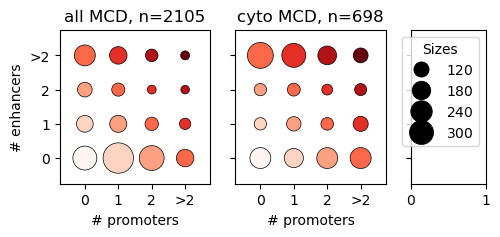

In [61]:
fig, (ax1,ax2,ax3)= plt.subplots(1, 3,figsize=(5.5, 2),sharey=True,gridspec_kw = {'width_ratios':[1,1,0.5]})

cg=(g['p']+g['e'])
cc=(c['p']+c['e'])

# ax1.scatter(data=g, x="p", y="e",s='frac',edgecolor='k',lw=0.5,c=cg,cmap='afmhot_r',alpha=1,vmin=-3000,vmax=30000)
# ax2.scatter(data=c, x="p", y="e",s='frac',edgecolor='k',lw=0.5,c=cc,cmap='afmhot_r',alpha=1,vmin=-3000,vmax=30000)
a=ax1.scatter(data=g, x="p", y="e",s=g['frac']*2500,edgecolor='k',lw=0.5,c=cg,cmap='Reds',alpha=1,vmin=0,vmax=6)
b=ax2.scatter(data=c, x="p", y="e",s=c['frac']*2500,edgecolor='k',lw=0.5,c=cc,cmap='Reds',alpha=1,vmin=0,vmax=6)
#ax2.scatter(data=c, x="p", y="e", s='frac',edgecolor='k',c='frac',cmap='autumn_r',alpha=0.7,vmin=60, vmax=900)

for ax in (ax1,ax2):
    ax.set_xlim(-0.75,3.75)
    ax.set_ylim(-0.75,3.75)
    
    ax.set_xlabel('# promoters')
    
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([0,1,2,3])
    ax.set_xticklabels(['0','1','2','>2'])
    ax.set_yticklabels(['0','1','2','>2'])

ax1.set_ylabel('# enhancers')
ax1.set_title('all MCD, n=2105')
ax2.set_title('cyto MCD, n=698')

handles, labels = b.legend_elements(prop="sizes", alpha=1,num=5,color='k')
legend2 = ax3.legend(handles, labels, loc="upper right", title="Sizes")


#plt.savefig('.pdf',dpi=300,bbox_inches='tight')

